In [171]:
from __future__ import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


In [172]:
# Pick signifficance level and set seed
alpha = 0.05
np.random.seed(999)

Testing the difference between a Poisson and a Gaussian distribution as Lambda changes using different tests

1) KS

2) AD

3) KL* (KL divergence test does not have built in function for testing against normal)

4) Person's chisq 

In [173]:
#Generate 1000 poisson distributions of sample size 1000 with different lambda
poisson = np.empty(1000, dtype=list)
# lam =np.random.randint(0,1000,1000)
lam = range(1,1001) 
for i,L in enumerate(lam): 
    poisson[i] = np.random.poisson(L, size = 1000)

In [200]:
# 1) ks-normal 
poi_norm_ks = list(map(lambda x: scipy.stats.kstest((x - x.mean())/x.std(),'norm'), poisson))
# 2) ad-normal
poi_norm_ad = list(map(lambda x: scipy.stats.anderson((x - x.mean())/x.std(),'norm'), poisson))

In [243]:
# 3) kl-normal
def get_kl(dist):
    mybins = np.linspace(min(dist), max(dist), 10) 
    mu, std = scipy.stats.norm.fit(dist)
    bincenters = mybins[:-1] + 0.5 * (mybins[1] - mybins[0])
    kl_b =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], scipy.stats.norm.pdf(bincenters, mu, std))
    return(kl_b)

poi_norm_kl = list(map(lambda x: get_kl(x), poisson))

In [260]:
# 4) pearson's Chisq-normal
def get_chisq(dist):
    mybins = np.linspace(min(dist), max(dist), 10) 
    bincenters = mybins[:-1] + 0.5 * (mybins[1] - mybins[0])
    mu, std = scipy.stats.norm.fit(dist)
    chisq =  scipy.stats.chisquare(np.histogram(dist, bins=mybins)[0], scipy.stats.norm.pdf(bincenters, mu, std))
    return(chisq)

poi_norm_chisq = list(map(lambda x: get_chisq(x), poisson))

In [236]:
chisq_statistics, chisq_pvalue = zip(*poi_norm_chisq)

In [211]:
ks_statistics, ks_pvalue = zip(*poi_norm_ks)

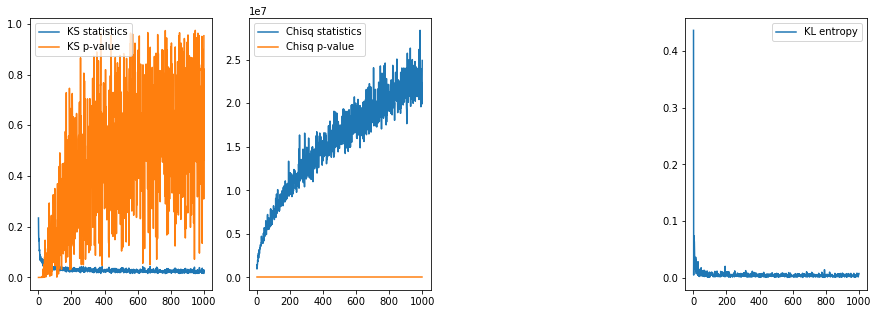

In [265]:
fig = pl.figure(figsize = (15,5))

fig.add_subplot(141)
pl.plot(lam, ks_statistics, label='KS statistics')
pl.plot(lam, ks_pvalue, label='KS p-value')
pl.legend()

fig.add_subplot(142)
pl.plot(lam, chisq_statistics, label='Chisq statistics')
pl.plot(lam, chisq_pvalue, label='Chisq p-value')
pl.legend()

# fig.add_subplot(143)
# pl.plot(lam, poi_norm_ad,  label='AD statistics')
# pl.plot([lam[0], lam[-1]],[0.05, 0.05], label="treshold")
# pl.ylim(0,10) #limit the y range or you cannot see the relevant part
# pl.legend()

fig.add_subplot(144)
pl.plot(lam, poi_norm_kl, label='KL entropy')
pl.legend()